In [2]:
#Importing required libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import os

In [3]:
# setting the path for joining multiple files
files = os.path.join("C:/Users/Niharika/Documents/Python Scripts/Telangana tourism Analysis/domestic_visitors", "domestic_visitors_*.csv")

In [4]:
# list of merged files returned
files = glob.glob(files)

In [5]:
domestic_visitors = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(domestic_visitors)

             district        date      month  year visitors
0            Adilabad  01-01-2016    January  2016   792136
1            Adilabad  01-02-2016   February  2016   937820
2            Adilabad  01-03-2016      March  2016   582946
3            Adilabad  01-04-2016      April  2016   341948
4            Adilabad  01-05-2016        May  2016   252887
...               ...         ...        ...   ...      ...
1507  Yadadri Bhongir  01-08-2019     August  2019   389010
1508  Yadadri Bhongir  01-09-2019  September  2019   366862
1509  Yadadri Bhongir  01-10-2019    October  2019   381860
1510  Yadadri Bhongir  01-11-2019   November  2019   365990
1511  Yadadri Bhongir  01-12-2019   December  2019   477635

[1512 rows x 5 columns]


In [6]:
# setting the path for joining multiple files
files_2 = os.path.join("C:/Users/Niharika/Documents/Python Scripts/Telangana tourism Analysis/foreign_visitors", "foreign_visitors_*.csv")

In [7]:
files_2 = glob.glob(files_2)

In [8]:
# joining files with concat and read_csv
foreign_visitors = pd.concat(map(pd.read_csv, files_2), ignore_index=True)
print(foreign_visitors)

             district        date      month  year visitors
0            Adilabad  01-01-2016    January  2016        2
1            Adilabad  01-02-2016   February  2016        0
2            Adilabad  01-03-2016      March  2016        2
3            Adilabad  01-04-2016      April  2016        0
4            Adilabad  01-05-2016        May  2016        0
...               ...         ...        ...   ...      ...
1507  Yadadri Bhongir  01-08-2019     August  2019        0
1508  Yadadri Bhongir  01-09-2019  September  2019        0
1509  Yadadri Bhongir  01-10-2019    October  2019        0
1510  Yadadri Bhongir  01-11-2019   November  2019        0
1511  Yadadri Bhongir  01-12-2019   December  2019        0

[1512 rows x 5 columns]


In [9]:
domestic_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [10]:
domestic_visitors.shape

(1512, 5)

In [14]:
#Checking for missing values
domestic_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [15]:
domestic_visitors.replace([" ",np.nan], 0, inplace=True)

In [16]:
domestic_visitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [17]:
#Converting visitors datatype to integer from object:
domestic_visitors['visitors']=domestic_visitors.visitors.astype("int64")

In [19]:
domestic_visitors.dtypes

district    object
date        object
month       object
year         int64
visitors     int64
dtype: object

In [20]:
domestic_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [23]:
#Checking for missing values
foreign_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [24]:
foreign_visitors["visitors"] = foreign_visitors["visitors"].replace(" ",0)

In [25]:
foreign_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [26]:
#Converting visitors datatype to integer from object:
foreign_visitors['visitors']=foreign_visitors.visitors.astype("int64")

In [27]:
#1) List of top 10 districs with highest number of domestic visitors:
Top_10_districts=domestic_visitors.groupby('district')['visitors'].sum().sort_values(ascending=True).nlargest(10)
Top_10_districts

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: visitors, dtype: int64

In [ ]:
#2) List of Top 3 districts based on CAGR(Compounded annual growth rate) of visitors between 2016-2019

In [28]:
districts=domestic_visitors["district"].unique()
districts

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [29]:
domestic_dict = pd.DataFrame({"district":districts})

In [30]:
#Domestic visitors in year 2016
domo_2016=[]
for i in districts:
    domestic_2016 = domestic_visitors[domestic_visitors["year"]==2016]
    domo = domestic_2016[domestic_2016["district"]==i].visitors.sum()
    domo_2016.append(domo)
domestic_dict["2016"]=domo_2016

In [31]:
#Domestic visitors in year 2019
domo_2019=[]
for i in districts:
    domestic_2019 = domestic_visitors[domestic_visitors["year"]==2019]
    domo = domestic_2019[domestic_2019["district"]==i].visitors.sum()
    domo_2019.append(domo)
domestic_dict["2019"]=domo_2019

In [32]:
domestic_dict.head()

,district,2016,2019
0,Adilabad,5075557,775895
1,Bhadradri Kothagudem,889030,12817737
2,Hyderabad,23394705,13802362
3,Jagtial,623077,3086115
4,Jangaon,40660,328890


In [33]:
#Calculating CAGR:Divide the Ending Value by the Beginning Value (i.e. Initial Value) Raise the Resulting Figure to the Inverse Number of Compounding Periods (1 / t) Subtract One to Convert the Implied CAGR into Percent Form
cagr=[]
for i in range(len(districts)):
    fv = domestic_dict.loc[i,"2019"]  #final value
    iv = domestic_dict.loc[i,"2016"]  #Initial value
    cagrr = (((fv/iv)**(1/3))-1)
    cagr.append(cagrr)

<ipython-input-33-2c7785735c68>:6: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)
<ipython-input-33-2c7785735c68>:6: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)


In [34]:
#Adding CAGR column to the dataframe: 
domestic_dict["CAGR"]=cagr

In [35]:
domestic_dict = domestic_dict.replace([np.inf,np.nan],0)

In [36]:
domestic_dict.head()

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372


In [37]:
dom_max = domestic_dict.sort_values(by="CAGR", ascending=False).head(3)
dom_max = dom_max.reset_index()
dom_max.drop("index", axis=1, inplace=True)

In [40]:
#Top 3 districts based on CAGR(Compounded annual growth rate) of visitors between 2016-2019
dom_max

,district,2016,2019,CAGR
0,Mancherial,7802,269810,2.257997
1,Warangal (Rural),19400,353500,1.631455
2,Bhadradri Kothagudem,889030,12817737,1.433875


<AxesSubplot:xlabel='district'>

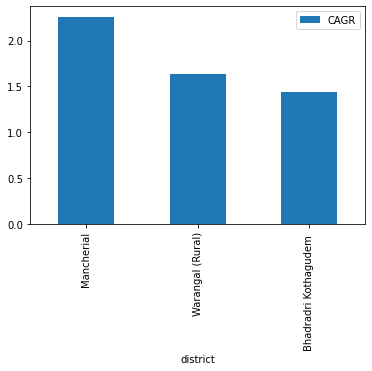

In [41]:
dom_max.head().plot("district", "CAGR", kind="bar")

In [43]:
#3) Bottom 3 CAGR
dom_min = domestic_dict.sort_values(by="CAGR", ascending=True).head(3)
dom_min = dom_min.reset_index()
dom_min.drop("index", axis=1, inplace=True)

<AxesSubplot:xlabel='district'>

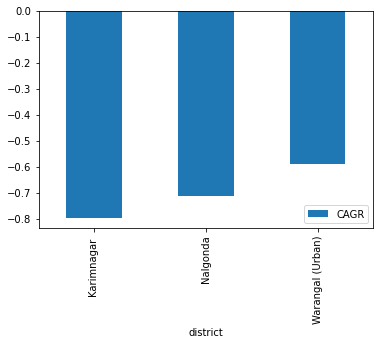

In [44]:
dom_min.head().plot("district", "CAGR", kind="bar")

In [ ]:
##Foreign visitors CAGR

In [45]:
#Top 3 CAGR
foreign_visitors.groupby(["year","district"])["visitors"].sum()

year  district             
2016  Adilabad                     10
      Bhadradri Kothagudem          0
      Hyderabad                163631
      Jagtial                       0
      Jangaon                       2
                                ...  
2019  Vikarabad                     0
      Wanaparthy                    0
      Warangal (Rural)              0
      Warangal (Urban)           2450
      Yadadri Bhongir               0
Name: visitors, Length: 126, dtype: int64

In [46]:
frgn_dict = pd.DataFrame({"district":districts})

In [47]:
domo_2016=[]
for i in districts:
    domestic_2016 = foreign_visitors[foreign_visitors["year"]==2016]
    domo = domestic_2016[domestic_2016["district"]==i].visitors.sum()
    domo_2016.append(domo)
frgn_dict["2016"]=domo_2016

In [48]:
domo_2019=[]
for i in districts:
    domestic_2019 = foreign_visitors[foreign_visitors["year"]==2019]
    domo = domestic_2019[domestic_2019["district"]==i].visitors.sum()
    domo_2019.append(domo)
frgn_dict["2019"]=domo_2019

In [49]:
frgn_dict.head()

,district,2016,2019
0,Adilabad,10,6
1,Bhadradri Kothagudem,0,0
2,Hyderabad,163631,319300
3,Jagtial,0,0
4,Jangaon,2,0


In [50]:
cagr=[]
for i in range(len(districts)):
    fv = frgn_dict.loc[i,"2019"]
    iv = frgn_dict.loc[i,"2016"]
    cagrr = (((fv/iv)**(1/3))-1)
    cagr.append(cagrr)

<ipython-input-50-a66b318b46b9>:5: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)
<ipython-input-50-a66b318b46b9>:5: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)


In [51]:
frgn_dict["CAGR"]=cagr

In [52]:
frgn_dict.head()

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,NaN
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,NaN
4,Jangaon,2,0,-1.000000


In [53]:
frgn_dict = frgn_dict.replace([np.inf,np.nan],0)

In [54]:
frgn_dict.head()

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,0.000000
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,0.000000
4,Jangaon,2,0,-1.000000


In [52]:
frgn_dict.sort_values(by="CAGR", ascending=False)

,district,2016,2019,CAGR
16,Nagarkurnool,29,199,0.900283
6,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619
29,Warangal (Urban),1899,2450,0.088630
25,Suryapet,0,0,0.000000
20,Peddapalli,0,0,0.000000
21,Rajanna Sircilla,0,0,0.000000
22,Ranga Reddy,0,0,0.000000
23,Sangareddy,0,0,0.000000
24,Siddipet,0,0,0.000000


In [55]:
frgn_dict_max = frgn_dict.sort_values(by="CAGR", ascending=False).head(3)
frgn_dict_max = frgn_dict_max.reset_index()
frgn_dict_max.drop("index", axis=1, inplace=True)

In [56]:
#Top 3 CAGR in foreign visitors
frgn_dict_max

,district,2016,2019,CAGR
0,Nagarkurnool,29,199,0.900283
1,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619


<AxesSubplot:xlabel='district'>

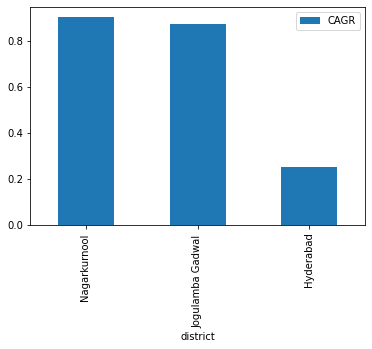

In [57]:
frgn_dict_max.head().plot("district", "CAGR", kind="bar")

In [58]:
#Bottom 3 CAGR in foreign visitors
frgn_dict_min = frgn_dict.sort_values(by="CAGR", ascending=True).head(3)
frgn_dict_min = frgn_dict_min.reset_index()
frgn_dict_min.drop("index", axis=1, inplace=True)

<AxesSubplot:xlabel='district'>

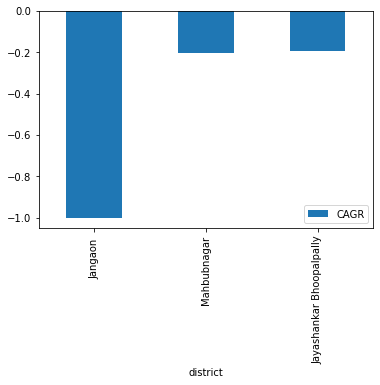

In [59]:
frgn_dict_min.head().plot("district", "CAGR", kind="bar")

In [ ]:
#4)What are the peak and low season months for Hyderabad based on data from 2016-2019 for Hyderabad district?

In [61]:
domestic_hyd=domestic_visitors[domestic_visitors["district"]=="Hyderabad"]

In [64]:
#4a)Peak season months for Hyderabad from Domestic visitors:
domestic_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).head()

month
June        16897783
December     9338637
October      6552397
January      6452101
April        6126839
Name: visitors, dtype: int64

<AxesSubplot:xlabel='month'>

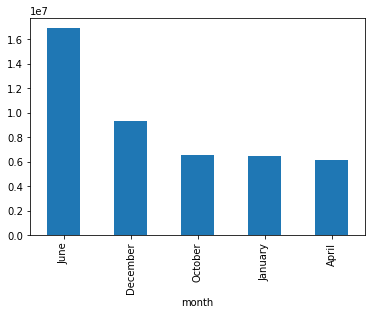

In [65]:
domestic_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).head().plot(kind="bar")

In [66]:
#4b)Low season months for Hyderabad from Domestic visitors:
domestic_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).tail()

month
November     5626156
July         5552527
September    5312283
March        5227626
February     5014430
Name: visitors, dtype: int64

<AxesSubplot:xlabel='month'>

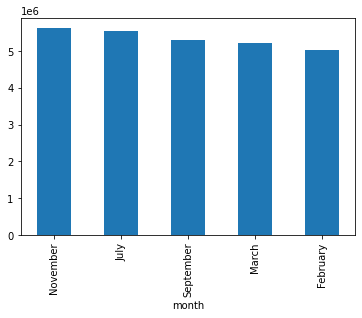

In [67]:
domestic_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).tail().plot(kind="bar")

In [ ]:
#5)Show the top & bottom 3 districts with high domestic to foreign tourist ratio:

In [73]:
df = pd.DataFrame({"foreign_visitors":foreign_visitors.groupby("district")["visitors"].sum()})

In [74]:
df["domestic_visitors"]=domestic_visitors.groupby("district")["visitors"].sum()

In [75]:
df.isnull().sum()

foreign_visitors     0
domestic_visitors    1
dtype: int64

In [76]:
df["domestic_visitors"] = df["domestic_visitors"].replace(np.nan, 0)

In [77]:
df

,foreign_visitors,domestic_visitors
district,,
Adilabad,32,7321575.0
Bhadradri Kothagudem,0,21600962.0
Hyderabad,1044898,83900960.0
Jagtial,0,11303514.0
Jangaon,2,826280.0
Jayashankar Bhoopalpally,1252,19632865.0
Jogulamba Gadwal,945,6813340.0
Kamareddy,0,1773.0
Karimnagar,0,9462383.0


In [78]:
#Calculaating ratio:
ratios = []
for i in range(33):
    ratio = df.iloc[i,1]/df.iloc[i,0]
    ratios.append(ratio)
df["Ratio"]=ratios

<ipython-input-78-392f952b0f6c>:3: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = df.iloc[i,1]/df.iloc[i,0]
<ipython-input-78-392f952b0f6c>:3: RuntimeWarning: invalid value encountered in scalar divide
  ratio = df.iloc[i,1]/df.iloc[i,0]


In [79]:
df

,foreign_visitors,domestic_visitors,Ratio
district,,,
Adilabad,32,7321575.0,2.287992e+05
Bhadradri Kothagudem,0,21600962.0,inf
Hyderabad,1044898,83900960.0,8.029584e+01
Jagtial,0,11303514.0,inf
Jangaon,2,826280.0,4.131400e+05
Jayashankar Bhoopalpally,1252,19632865.0,1.568120e+04
Jogulamba Gadwal,945,6813340.0,7.209884e+03
Kamareddy,0,1773.0,inf
Karimnagar,0,9462383.0,inf


In [80]:
#Replacing the NA values
df = df.replace([np.nan, np.inf], 0)

In [81]:
#filtering districts with foreign vistors>100 to get better ratio:
df_ratio = df.sort_values(by="Ratio", ascending=False).where(df["foreign_visitors"]>100)

In [82]:
df_ratio

,foreign_visitors,domestic_visitors,Ratio
district,,,
Nirmal,NaN,NaN,NaN
Jangaon,NaN,NaN,NaN
Adilabad,NaN,NaN,NaN
Mancherial,NaN,NaN,NaN
Nizamabad,NaN,NaN,NaN
Jayashankar Bhoopalpally,1252.0,19632865.0,15681.202077
Nagarkurnool,761.0,7424355.0,9756.051248
Mahbubnagar,2282.0,17180118.0,7528.535495
Jogulamba Gadwal,945.0,6813340.0,7209.883598


In [83]:
#Dropping NA values
df_ratio = df_ratio.dropna()

In [84]:
df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)

<ipython-input-84-0ded6af9972e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)


In [85]:
df_ratio = df_ratio.reset_index()

In [91]:
# 5a) Top 3 districts with high domestic to foreign tourist ratio:
df_ratio.head(3)

,district,foreign_visitors,domestic_visitors,Ratio
0,Hyderabad,1044898.0,83900960.0,80.295837
1,Warangal (Rural),306.0,819162.0,2677.000000
2,Mulugu,575.0,1819800.0,3164.869565


<AxesSubplot:xlabel='district'>

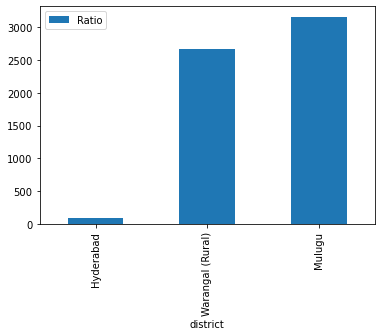

In [92]:
df_ratio.head(3).plot("district", "Ratio", kind="bar")

In [93]:
df_ratio.tail(3).sort_values(by="Ratio", ascending=False, inplace=True)

<ipython-input-93-66d6b82f0d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.tail(3).sort_values(by="Ratio", ascending=False, inplace=True)


In [94]:
#5b) Bottom 3 districts with high domestic to foreign tourist ratio:
df_ratio.tail(3)

,district,foreign_visitors,domestic_visitors,Ratio
5,Mahbubnagar,2282.0,17180118.0,7528.535495
6,Nagarkurnool,761.0,7424355.0,9756.051248
7,Jayashankar Bhoopalpally,1252.0,19632865.0,15681.202077


<AxesSubplot:xlabel='district'>

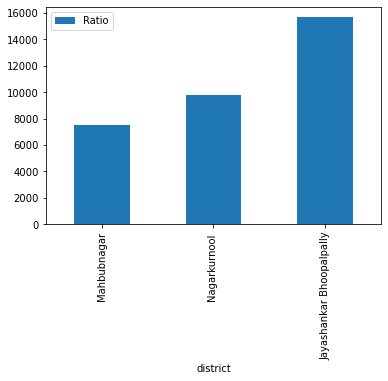

In [95]:
df_ratio.tail(3).plot("district", "Ratio", kind="bar")